### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix,accuracy_score

%matplotlib inline

### Reading Data - Train and Test

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

### EDA

In [3]:
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


##### The next two cells: checking the data for nulls, dtypes, mean...etc

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
train_data.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


##### The next few cells we check the nunique values per-feature. 

In [6]:
cols_name = list(train_data.columns)
cols_name

['ID',
 'Gender',
 'Ever_Married',
 'Age',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'Var_1',
 'Segmentation']

In [7]:
for name in cols_name:
    print(f"{name}:{train_data[name].nunique()} | dtype:{train_data[name].dtype} | values:{train_data[name].unique()}|")

ID:8068 | dtype:int64 | values:[462809 462643 466315 ... 465406 467299 461879]|
Gender:2 | dtype:object | values:['Male' 'Female']|
Ever_Married:2 | dtype:object | values:['No' 'Yes' nan]|
Age:67 | dtype:int64 | values:[22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]|
Graduated:2 | dtype:object | values:['No' 'Yes' nan]|
Profession:9 | dtype:object | values:['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]|
Work_Experience:15 | dtype:float64 | values:[ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]|
Spending_Score:3 | dtype:object | values:['Low' 'Average' 'High']|
Family_Size:9 | dtype:float64 | values:[ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.]|
Var_1:7 | dtype:object | values:['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']|
Segmentation:4 | d

<AxesSubplot:>

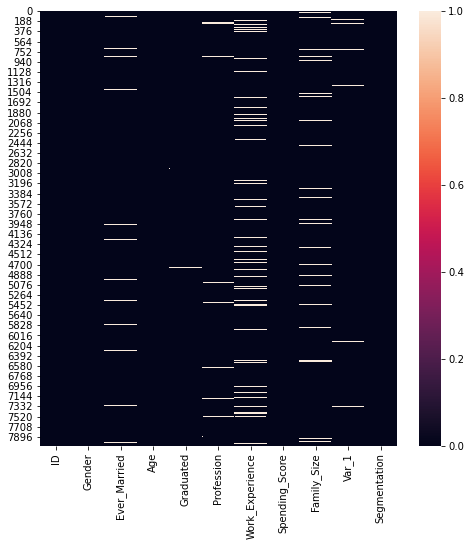

In [8]:
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(train_data.isna())

C:\Users\Busss\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

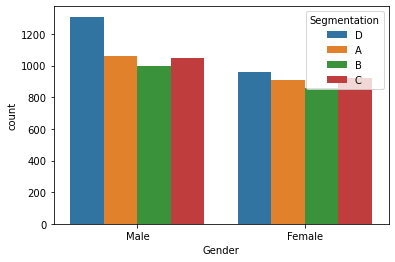

In [9]:
sns.countplot(train_data['Gender'],hue=train_data['Segmentation'])

C:\Users\Busss\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Busss\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Busss\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

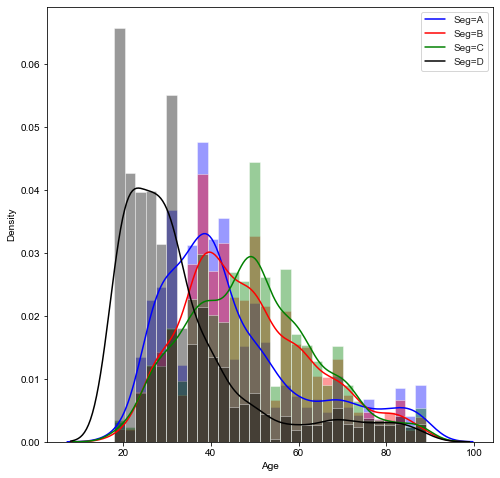

In [10]:
fig, ax = plt.subplots(figsize=(8,8)) 

sns.set_style('whitegrid')
sns.distplot(train_data[train_data['Segmentation']=='A']['Age'],bins=30,color='blue')
sns.distplot(train_data[train_data['Segmentation']=='B']['Age'],bins=30,color='red')
sns.distplot(train_data[train_data['Segmentation']=='C']['Age'],bins=30,color='green')
sns.distplot(train_data[train_data['Segmentation']=='D']['Age'],bins=30,color='black')
plt.legend(labels=['Seg=A', 'Seg=B', 'Seg=C','Seg=D'])

C:\Users\Busss\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profession', ylabel='count'>

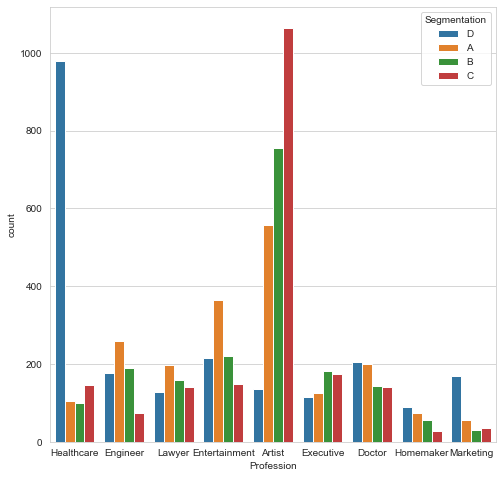

In [11]:
fig, ax = plt.subplots(figsize=(8,8)) 

sns.countplot(train_data['Profession'],hue=train_data['Segmentation'])

C:\Users\Busss\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work_Experience', ylabel='count'>

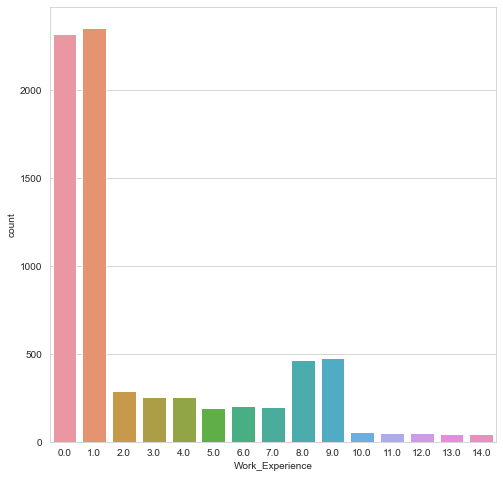

In [12]:
fig, ax = plt.subplots(figsize=(8,8)) 
sns.countplot(train_data['Work_Experience'])

<AxesSubplot:>

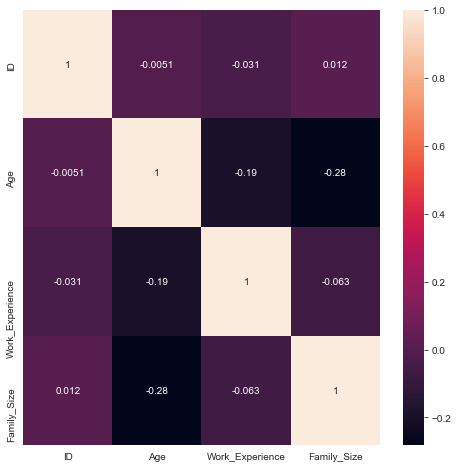

In [13]:
fig, ax = plt.subplots(figsize=(8,8)) 

sns.heatmap(train_data.corr(),annot=True)

##### First lets deal with the null/nan values

In [14]:
def fill_na_of_this_col_with_max(col_name=False, df=train_data):
    if col_name==False:
        print("col_name required")
        return None
    print(f"Working on {col_name}::Nulls")
    print(f"Before Nulls: {(df[col_name].isna().sum())}")
    fill_value = df[col_name].value_counts().keys()[0]
    print(f'filling "{col_name}" Nulls with the max value of "{fill_value}" with type {type(fill_value)}')
    df[col_name].fillna(fill_value, inplace=True)
    print(f"After Nulls: {df[col_name].isna().sum()}")   

In [15]:
fill_na_of_this_col_with_max('Ever_Married')
fill_na_of_this_col_with_max('Graduated')
fill_na_of_this_col_with_max('Profession')
fill_na_of_this_col_with_max('Work_Experience')
fill_na_of_this_col_with_max('Family_Size')
fill_na_of_this_col_with_max('Var_1')

Working on Ever_Married::Nulls
Before Nulls: 140
filling "Ever_Married" Nulls with the max value of "Yes" with type <class 'str'>
After Nulls: 0
Working on Graduated::Nulls
Before Nulls: 78
filling "Graduated" Nulls with the max value of "Yes" with type <class 'str'>
After Nulls: 0
Working on Profession::Nulls
Before Nulls: 124
filling "Profession" Nulls with the max value of "Artist" with type <class 'str'>
After Nulls: 0
Working on Work_Experience::Nulls
Before Nulls: 829
filling "Work_Experience" Nulls with the max value of "1.0" with type <class 'numpy.float64'>
After Nulls: 0
Working on Family_Size::Nulls
Before Nulls: 335
filling "Family_Size" Nulls with the max value of "2.0" with type <class 'numpy.float64'>
After Nulls: 0
Working on Var_1::Nulls
Before Nulls: 76
filling "Var_1" Nulls with the max value of "Cat_6" with type <class 'str'>
After Nulls: 0


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


##### No more Null values

##### The ID will be ignored/dropped as it provides no help in classification. As for the ordinal values, like 'Spending_Score', will be converted to 1,2,3..etc
Getting the unique values of 'Spending_Score' to build the map

In [17]:
train_data['Spending_Score'].unique()

array(['Low', 'Average', 'High'], dtype=object)

In [18]:
spend_map = {'Low':0, 'Average':1, 'High':2}
train_data.replace({"Spending_Score": spend_map}, inplace=True)
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,0,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,1,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,0,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,2,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,2,6.0,Cat_6,A


##### Changing all the Yes and NO to 1 and 0: The 'Ever_Married' and 'Graduated'

In [19]:
train_data['Ever_Married'].replace({'Yes':1,'No':0}, inplace=True)
train_data['Graduated'].replace({'Yes':1,'No':0}, inplace=True)
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,0,22,0,Healthcare,1.0,0,4.0,Cat_4,D
1,462643,Female,1,38,1,Engineer,1.0,1,3.0,Cat_4,A
2,466315,Female,1,67,1,Engineer,1.0,0,1.0,Cat_6,B
3,461735,Male,1,67,1,Lawyer,0.0,2,2.0,Cat_6,B
4,462669,Female,1,40,1,Entertainment,1.0,2,6.0,Cat_6,A


##### Changing Male = 1 and Female = 0 in Gender

In [20]:
train_data['Gender'].replace({'Male':1,'Female':0}, inplace=True)
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,Healthcare,1.0,0,4.0,Cat_4,D
1,462643,0,1,38,1,Engineer,1.0,1,3.0,Cat_4,A
2,466315,0,1,67,1,Engineer,1.0,0,1.0,Cat_6,B
3,461735,1,1,67,1,Lawyer,0.0,2,2.0,Cat_6,B
4,462669,0,1,40,1,Entertainment,1.0,2,6.0,Cat_6,A


##### Checking and mapping the Var_1. The Var_1 is used for anonymization. 
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

In [21]:
var = sorted(list(train_data['Var_1'].unique()))
var_map = {}
for i,v in enumerate(var):
    #var_map[v]=chr(i+ord('A'))
    var_map[v]=i

print(var_map)
train_data.replace({"Var_1": var_map}, inplace=True)
train_data.head()

{'Cat_1': 0, 'Cat_2': 1, 'Cat_3': 2, 'Cat_4': 3, 'Cat_5': 4, 'Cat_6': 5, 'Cat_7': 6}


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,Healthcare,1.0,0,4.0,3,D
1,462643,0,1,38,1,Engineer,1.0,1,3.0,3,A
2,466315,0,1,67,1,Engineer,1.0,0,1.0,5,B
3,461735,1,1,67,1,Lawyer,0.0,2,2.0,5,B
4,462669,0,1,40,1,Entertainment,1.0,2,6.0,5,A


##### Lets check for duplicates

In [22]:
train_data.duplicated().sum()

0

##### Drop unwanted column

In [23]:
train_data.drop(['ID'], axis=1, inplace=True)
train_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,Healthcare,1.0,0,4.0,3,D
1,0,1,38,1,Engineer,1.0,1,3.0,3,A
2,0,1,67,1,Engineer,1.0,0,1.0,5,B
3,1,1,67,1,Lawyer,0.0,2,2.0,5,B
4,0,1,40,1,Entertainment,1.0,2,6.0,5,A


### Feature Engineering

##### Getting the min - max of the column Ages. 
##### Create groups of ages with increments of 5. ex: age:22 -> 4.

In [24]:
print(train_data['Age'].min())
print(train_data['Age'].max())

18
89


In [25]:
train_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,Healthcare,1.0,0,4.0,3,D
1,0,1,38,1,Engineer,1.0,1,3.0,3,A
2,0,1,67,1,Engineer,1.0,0,1.0,5,B
3,1,1,67,1,Lawyer,0.0,2,2.0,5,B
4,0,1,40,1,Entertainment,1.0,2,6.0,5,A


In [26]:
bins= list(range(0, 101, 5))
labels = list(range(0, 20))
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)
train_data['AgeGroup'] = train_data['AgeGroup'].astype(float)

In [27]:
train_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,AgeGroup
0,1,0,22,0,Healthcare,1.0,0,4.0,3,D,4.0
1,0,1,38,1,Engineer,1.0,1,3.0,3,A,7.0
2,0,1,67,1,Engineer,1.0,0,1.0,5,B,13.0
3,1,1,67,1,Lawyer,0.0,2,2.0,5,B,13.0
4,0,1,40,1,Entertainment,1.0,2,6.0,5,A,8.0


#### Getting dummies for 'Profession'

In [28]:
dummies = pd.get_dummies(train_data['Profession'])
train_data = pd.concat([train_data, dummies], axis=1)      

train_data.drop('Profession', axis=1 ,inplace=True)
train_data.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,AgeGroup,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,1,0,22,0,1.0,0,4.0,3,D,4.0,0,0,0,0,0,1,0,0,0
1,0,1,38,1,1.0,1,3.0,3,A,7.0,0,0,1,0,0,0,0,0,0
2,0,1,67,1,1.0,0,1.0,5,B,13.0,0,0,1,0,0,0,0,0,0
3,1,1,67,1,0.0,2,2.0,5,B,13.0,0,0,0,0,0,0,0,1,0
4,0,1,40,1,1.0,2,6.0,5,A,8.0,0,0,0,1,0,0,0,0,0


In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   int64  
 1   Ever_Married     8068 non-null   int64  
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   int64  
 4   Work_Experience  8068 non-null   float64
 5   Spending_Score   8068 non-null   int64  
 6   Family_Size      8068 non-null   float64
 7   Var_1            8068 non-null   int64  
 8   Segmentation     8068 non-null   object 
 9   AgeGroup         8068 non-null   float64
 10  Artist           8068 non-null   uint8  
 11  Doctor           8068 non-null   uint8  
 12  Engineer         8068 non-null   uint8  
 13  Entertainment    8068 non-null   uint8  
 14  Executive        8068 non-null   uint8  
 15  Healthcare       8068 non-null   uint8  
 16  Homemaker        8068 non-null   uint8  
 17  Lawyer        

### Correlation and heatmap

In [30]:
train_data.corr()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,AgeGroup,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Gender,1.000000,0.111732,0.030216,-0.033206,-0.057212,0.061432,0.057920,0.029660,0.029966,-0.041039,0.006544,-0.214829,0.136387,0.227074,0.030698,-0.132781,-0.023391,-0.042481
Ever_Married,0.111732,1.000000,0.556892,0.188450,-0.090500,0.610642,-0.067102,0.076450,0.559507,0.167710,-0.077566,0.015791,0.022238,0.199088,-0.414947,-0.017369,0.201930,-0.094699
Age,0.030216,0.556892,1.000000,0.235752,-0.177344,0.415485,-0.270793,0.167332,0.996829,0.111533,-0.114043,-0.031729,-0.010086,0.129303,-0.442792,-0.058837,0.549588,-0.077097
Graduated,-0.033206,0.188450,0.235752,1.000000,0.037831,0.102736,-0.217698,0.120044,0.240666,0.344858,-0.027781,-0.112134,0.008317,-0.068019,-0.238018,-0.020639,0.003218,-0.087240
Work_Experience,-0.057212,-0.090500,-0.177344,0.037831,1.000000,-0.074266,-0.059565,0.025826,-0.175765,0.015076,0.001168,-0.003726,0.013568,-0.026254,-0.007874,0.174569,-0.112868,-0.004291
Spending_Score,0.061432,0.610642,0.415485,0.102736,-0.074266,1.000000,0.100744,0.078314,0.416032,0.038948,-0.081867,-0.024213,-0.055676,0.346936,-0.268199,-0.021732,0.204095,-0.068466
Family_Size,0.057920,-0.067102,-0.270793,-0.217698,-0.059565,0.100744,1.000000,-0.137801,-0.272698,-0.142722,0.006883,0.026703,-0.014348,0.109023,0.231376,-0.070930,-0.167923,0.025103
Var_1,0.029660,0.076450,0.167332,0.120044,0.025826,0.078314,-0.137801,1.000000,0.168984,0.090068,-0.019508,-0.061780,-0.035741,0.034549,-0.078865,-0.034158,0.094277,-0.037420
AgeGroup,0.029966,0.559507,0.996829,0.240666,-0.175765,0.416032,-0.272698,0.168984,1.000000,0.115439,-0.114105,-0.030165,-0.010241,0.129758,-0.447177,-0.059083,0.546550,-0.076261
Artist,-0.041039,0.167710,0.111533,0.344858,0.015076,0.038948,-0.142722,0.090068,0.115439,1.000000,-0.212936,-0.214791,-0.254628,-0.197499,-0.310122,-0.123677,-0.201741,-0.135144


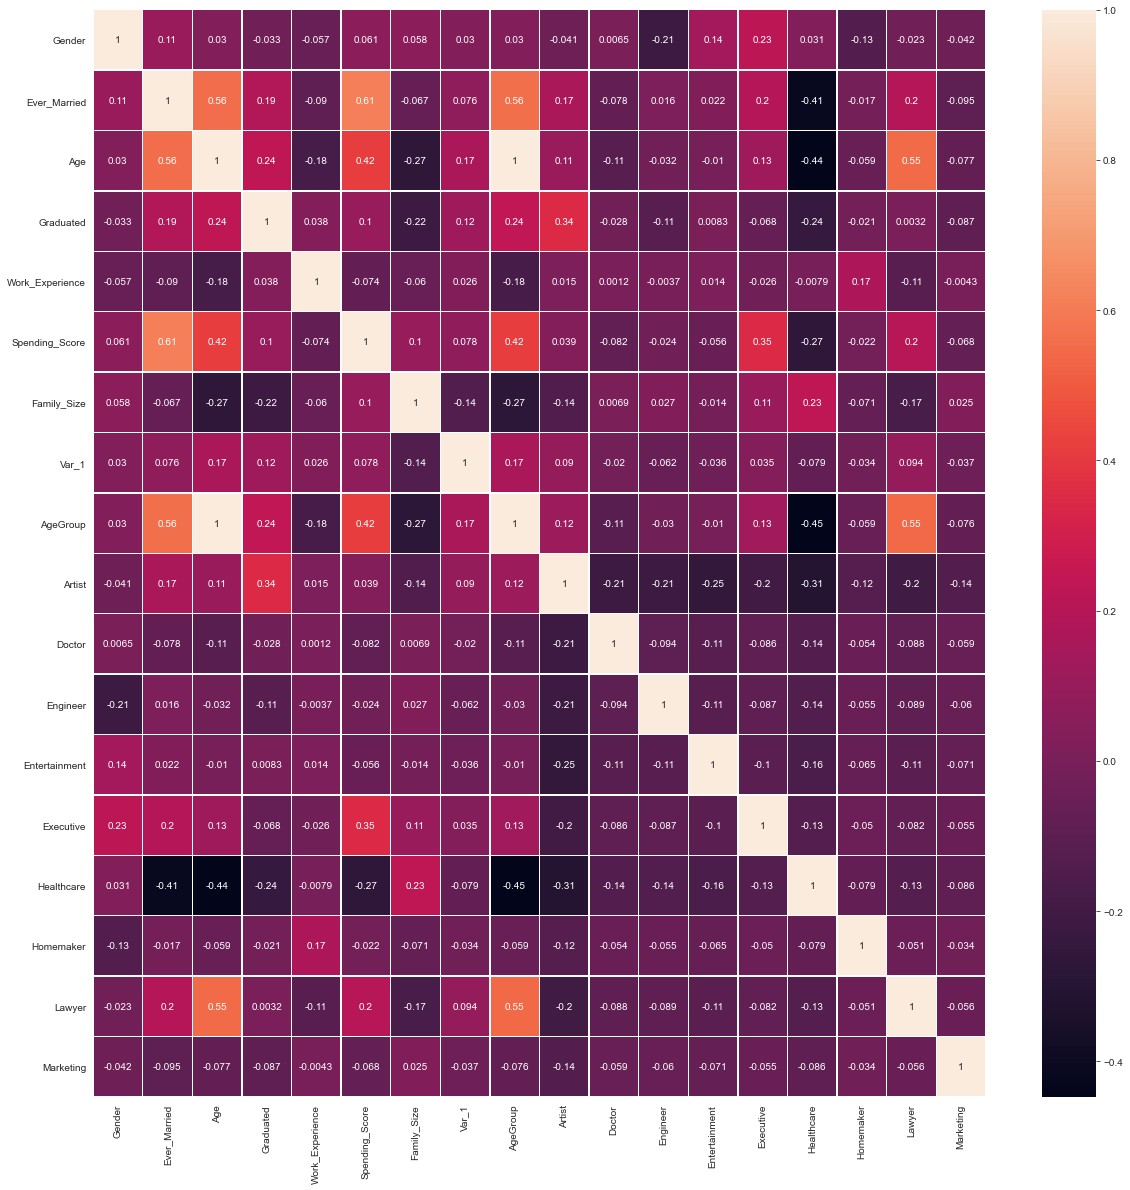

In [31]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(train_data.corr(), ax=ax, linewidths=0.5, annot=True);

### Models
#### Preparing the data.
Separating the features and target. Then splitting the data into training and validation.

In [32]:
train_data.head(20)

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,AgeGroup,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,1,0,22,0,1.0,0,4.0,3,D,4.0,0,0,0,0,0,1,0,0,0
1,0,1,38,1,1.0,1,3.0,3,A,7.0,0,0,1,0,0,0,0,0,0
2,0,1,67,1,1.0,0,1.0,5,B,13.0,0,0,1,0,0,0,0,0,0
3,1,1,67,1,0.0,2,2.0,5,B,13.0,0,0,0,0,0,0,0,1,0
4,0,1,40,1,1.0,2,6.0,5,A,8.0,0,0,0,1,0,0,0,0,0
5,1,1,56,0,0.0,1,2.0,5,C,11.0,1,0,0,0,0,0,0,0,0
6,1,0,32,1,1.0,0,3.0,5,C,6.0,0,0,0,0,0,1,0,0,0
7,0,0,33,1,1.0,0,3.0,5,D,6.0,0,0,0,0,0,1,0,0,0
8,0,1,61,1,0.0,0,3.0,6,D,12.0,0,0,1,0,0,0,0,0,0
9,0,1,55,1,1.0,1,4.0,5,C,11.0,1,0,0,0,0,0,0,0,0


In [33]:
X = train_data.drop('Segmentation', axis=1)
y = train_data['Segmentation']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
X.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,AgeGroup,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,1,0,22,0,1.0,0,4.0,3,4.0,0,0,0,0,0,1,0,0,0
1,0,1,38,1,1.0,1,3.0,3,7.0,0,0,1,0,0,0,0,0,0
2,0,1,67,1,1.0,0,1.0,5,13.0,0,0,1,0,0,0,0,0,0
3,1,1,67,1,0.0,2,2.0,5,13.0,0,0,0,0,0,0,0,1,0
4,0,1,40,1,1.0,2,6.0,5,8.0,0,0,0,1,0,0,0,0,0


#### BaseModel

In [34]:
#the 10000 iteration is to help the model converge 
lr = LogisticRegression(max_iter=2000,random_state=100)

##### BaseModel - All features Without scaling

In [35]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
lr.score(X_train,y_train)

0.5051131081499846

In [36]:
cm = confusion_matrix(y_train, y_pred)
ac = accuracy_score(y_train, y_pred)
print(cm,ac)

[[ 778  157  352  301]
 [ 466  218  605  170]
 [ 233  128 1018  211]
 [ 370   72  129 1246]] 0.5051131081499846


In [37]:
#lr.predict(X_val)
lr.score(X_val,y_val)

0.506815365551425

##### BaseModel - All features With scaling
Getting the scaler and apply fit + transform

In [38]:
#ss = StandardScaler()
#ss = MinMaxScaler()
ss = Normalizer() 
#ss = RobustScaler()
scaled_X_train = ss.fit_transform(X_train)
scaled_X_val = ss.transform(X_val)

In [39]:
lr.fit(scaled_X_train,y_train)
y_pred = lr.predict(scaled_X_train)
lr.score(scaled_X_train,y_train)

0.4564611093895259

In [40]:
cm = confusion_matrix(y_train, y_pred)
ac = accuracy_score(y_train, y_pred)
print(cm,ac)

[[ 670   64  494  360]
 [ 424   78  740  217]
 [ 313   38  989  250]
 [ 364   46  198 1209]] 0.4564611093895259


In [41]:
lr.score(scaled_X_val,y_val)

0.4454770755885997

OMD

##### Using LogisticRegression and Cross-Validation
###### Not Scaled

In [42]:
lscv = LogisticRegressionCV(cv=10, max_iter=2000)
lscv.fit(X_train,y_train)
lscv.score(X_train,y_train)

0.5055779361636195

In [43]:
lscv.score(X_val,y_val)

0.5074349442379182

###### Scaled

In [44]:
lscv = LogisticRegressionCV(cv=10, max_iter=2000)
lscv.fit(scaled_X_train,y_train)
lscv.score(scaled_X_train,y_train)

0.49705608924697864

In [45]:
lscv.score(scaled_X_val,y_val)

0.506815365551425

Using KNN
###### KNN - Not Scaled - default parameters

In [46]:
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
kn.score(X_train,y_train)

0.6237991942981097

In [47]:
kn.score(X_val,y_val)

0.42627013630731103

###### KNN - Scaled - default parameters

In [48]:
kn = KNeighborsClassifier()
kn.fit(scaled_X_train,y_train)
kn.score(scaled_X_train,y_train)

0.6299969011465758

In [49]:
kn.score(scaled_X_val,y_val)

0.4603469640644362

###### KNN - NOT Scaled - custom parameters


###### n_neighbors = 9

In [50]:
kn = KNeighborsClassifier(n_neighbors=9)
kn.fit(X_train,y_train)
kn.score(X_train,y_train)

0.5735977688255346

In [51]:
kn.score(X_val,y_val)

0.45291201982651796

###### KNN - Scaled - custom parameters

###### n_neighbors=9

In [52]:
kn = KNeighborsClassifier(n_neighbors=9)
kn.fit(scaled_X_train,y_train)
kn.score(scaled_X_train,y_train)

0.5821196157421754

In [53]:
kn.score(scaled_X_val,y_val)

0.4646840148698885

###### n_neighbors=3

###### KNN - NOT Scaled - GridSearch with  the following parameters: 
n_neighbors with increment of 3 starting 0(excluded) up to 100 |
weights: uniform and distance |
metric: euclidean and manhattan 
cv: 5 |
verbose = 3 |
n_jobs= -1

In [54]:
neighbors = [i for i in range(0,100,3)][1:]
parameters = {'n_neighbors':neighbors, 'weights':['uniform','distance'], 'metric':['euclidean','manhattan']}
model = KNeighborsClassifier()

gs = GridSearchCV(model, parameters, cv=15, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30,
                                         33, 36, 39, 42, 45, 48, 51, 54, 57, 60,
                                         63, 66, 69, 72, 75, 78, 81, 84, 87, 90, ...],
                         'weights': ['uniform', 'distance']})

In [55]:
print('best_estimator_ :', gs.best_estimator_)
print('best_params_ :', gs.best_params_)
print('best_score_ :', gs.best_score_)

best_estimator_ : KNeighborsClassifier(metric='manhattan', n_neighbors=45)
best_params_ : {'metric': 'manhattan', 'n_neighbors': 45, 'weights': 'uniform'}
best_score_ : 0.491014586593284


###### KNN - Scaled - GridSearch with  the following parameters: 
n_neighbors with increment of 3 starting 0(excluded) up to 100 |
weights: uniform and distance |
metric: euclidean and manhattan 
cv: 5 |
verbose = 3 |
n_jobs= -1

In [56]:
neighbors = [i for i in range(0,100,3)][1:]
parameters = {'n_neighbors':neighbors, 'weights':['uniform','distance'], 'metric':['euclidean','manhattan']}
model = KNeighborsClassifier()

gs = GridSearchCV(model, parameters, cv=15, n_jobs=-1)
gs.fit(scaled_X_train, y_train)

GridSearchCV(cv=15, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30,
                                         33, 36, 39, 42, 45, 48, 51, 54, 57, 60,
                                         63, 66, 69, 72, 75, 78, 81, 84, 87, 90, ...],
                         'weights': ['uniform', 'distance']})

In [57]:
print('best_estimator_ :', gs.best_estimator_)
print('best_params_ :', gs.best_params_)
print('best_score_ :', gs.best_score_)

best_estimator_ : KNeighborsClassifier(metric='manhattan', n_neighbors=18)
best_params_ : {'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'uniform'}
best_score_ : 0.5006262702566593


In [58]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 6).fit(X_train, y_train)
dtree_model.score(X_train, y_train)

0.5429191199256275

In [59]:
dtree_model.score(X_val, y_val)

0.5142503097893433